<a href="https://colab.research.google.com/github/KumarHarsh37/EDA_TheoryDA1/blob/main/21BDS0260.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


First 5 rows of the dataset:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0.0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0.0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0.0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0.0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0.0,73.0,0


Dataset Dimensions: (54808, 13)
Summary Statistics:


,employee_id,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54807.000000,52247.000000
mean,39195.830627,1.253011,3.329256,5.865512,0.023172,63.712347
std,22586.581449,0.609264,1.259993,4.265094,0.150452,13.522016
min,1.000000,1.000000,1.000000,1.000000,0.000000,39.000000
25%,19669.750000,1.000000,3.000000,3.000000,0.000000,51.000000
50%,39225.500000,1.000000,3.000000,5.000000,0.000000,60.000000
75%,58730.500000,1.000000,4.000000,7.000000,0.000000,77.000000
max,78298.000000,10.000000,5.000000,37.000000,1.000000,99.000000


Missing Values Count:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 1
avg_training_score      2561
is_promoted                0
dtype: int64


<ipython-input-2-38d590734a6d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  HarshKumar[col].fillna(HarshKumar[col].mean(), inplace=True)
<ipython-input-2-38d590734a6d>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Missing values after handling:
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64


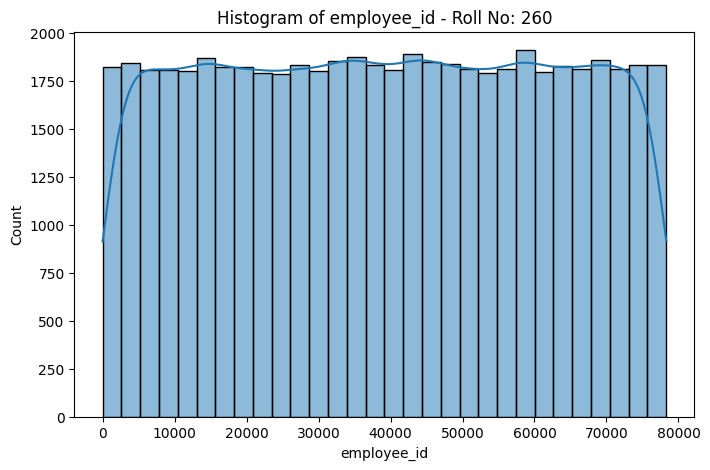

In [ ]:
file_path = "/content/drive/MyDrive/EDATASK/employee_promotion.csv"
HarshKumar = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(HarshKumar.head())

# Check the dimensions of the dataset
print(f"Dataset Dimensions: {HarshKumar.shape}")

# Summary statistics
print("Summary Statistics:")
display(HarshKumar.describe())

# Check for missing values
print("Missing Values Count:")
print(HarshKumar.isnull().sum())

# Data Handling - Fill missing numerical values with mean and categorical with mode
for col in HarshKumar.select_dtypes(include=['number']).columns:
    HarshKumar[col].fillna(HarshKumar[col].mean(), inplace=True)

for col in HarshKumar.select_dtypes(include=['object']).columns:
    HarshKumar[col].fillna(HarshKumar[col].mode()[0], inplace=True)

print("Missing values after handling:")
print(HarshKumar.isnull().sum())

# Data Visualization
plt.figure(figsize=(8, 5))
sns.histplot(HarshKumar.select_dtypes(include=['number']).iloc[:, 0], bins=30, kde=True)
plt.title(f"Histogram of {HarshKumar.select_dtypes(include=['number']).columns[0]} - Roll No: 260")
plt.show()

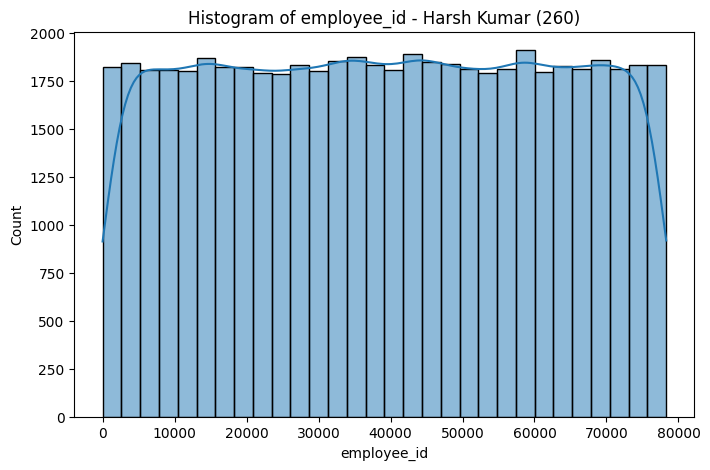

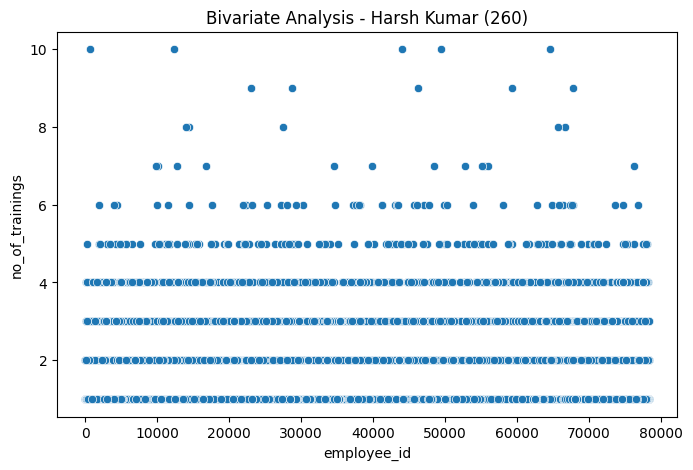

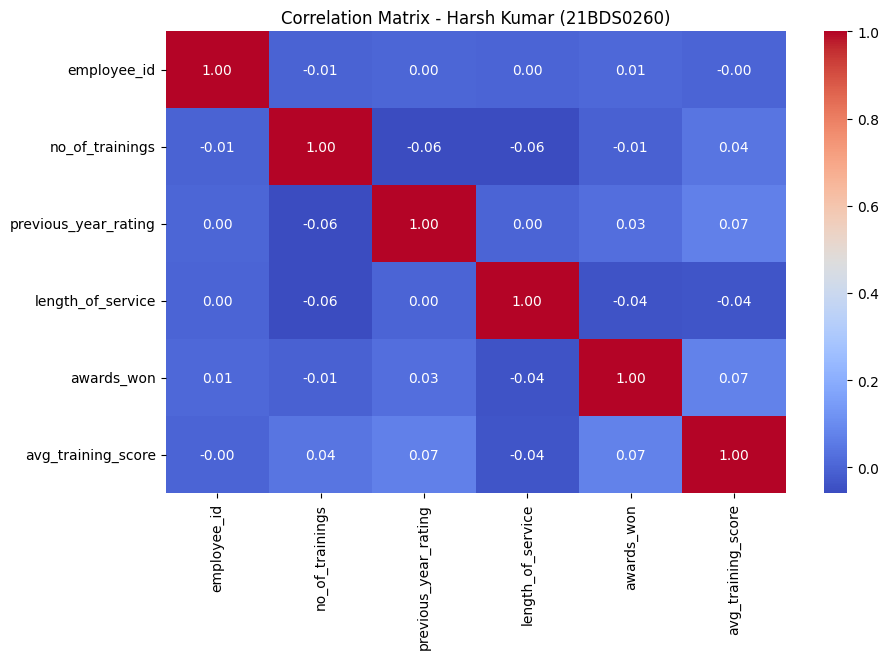

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(HarshKumar.select_dtypes(include=['number']).iloc[:, 0], bins=30, kde=True)
plt.title(f"Histogram of {HarshKumar.select_dtypes(include=['number']).columns[0]} - Harsh Kumar (260)")
plt.show()

# Bivariate analysis - Scatter plot of two numerical variables
plt.figure(figsize=(8, 5))
sns.scatterplot(x=HarshKumar.select_dtypes(include=['number']).iloc[:, 0],
                y=HarshKumar.select_dtypes(include=['number']).iloc[:, 1])
plt.title(f"Bivariate Analysis - Harsh Kumar (260)")
plt.xlabel(HarshKumar.select_dtypes(include=['number']).columns[0])
plt.ylabel(HarshKumar.select_dtypes(include=['number']).columns[1])
plt.show()

# Multivariate analysis - Correlation matrix
plt.figure(figsize=(10, 6))

# Selecting only numeric columns for correlation
numeric_cols = HarshKumar.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title(f"Correlation Matrix - Harsh Kumar (21BDS0260)")
plt.show()



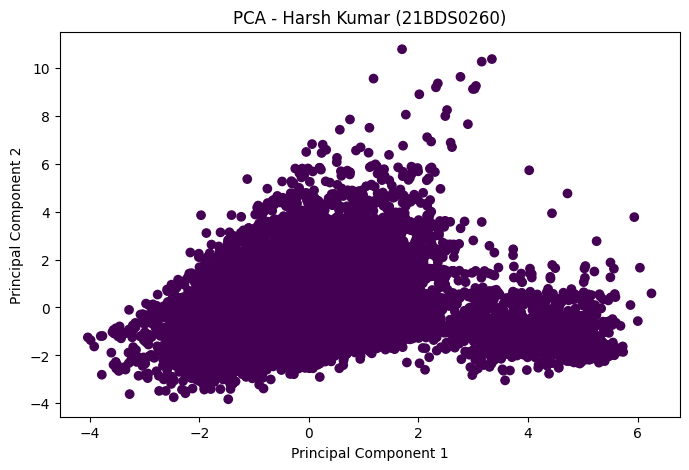

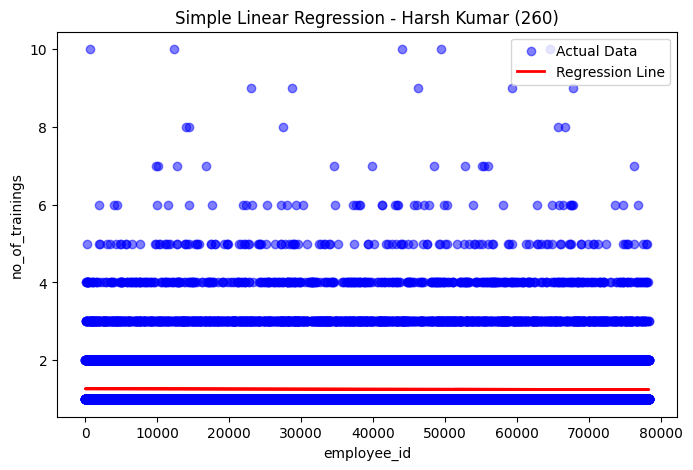

Mean Squared Error: 0.36
R² Score: -0.00


In [ ]:
numeric_cols = HarshKumar.select_dtypes(include=['number']).drop(columns=['Cluster'], errors='ignore')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=HarshKumar.get('Cluster', pd.Series(0, index=HarshKumar.index)), cmap='viridis')
plt.title(f"PCA - Harsh Kumar (21BDS0260)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# -------------------------------
# MODEL BUILDING - SIMPLE LINEAR REGRESSION
# -------------------------------

# Select the first numerical column as the independent variable (X)
# and the second numerical column as the dependent variable (y)
X = numeric_cols.iloc[:, 0].values.reshape(-1, 1)
y = numeric_cols.iloc[:, 1].values.reshape(-1, 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualizing regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label="Actual Data")
plt.plot(X, model.predict(X), color='red', linewidth=2, label="Regression Line")
plt.title(f"Simple Linear Regression - Harsh Kumar (260)")
plt.xlabel(numeric_cols.columns[0])
plt.ylabel(numeric_cols.columns[1])
plt.legend()
plt.show()

# -------------------------------
# MODEL EVALUATION - MEAN SQUARED ERROR & R² SCORE
# -------------------------------

y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")